In [17]:
# [0]
# import Libs
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

import helper

# Preparing dataset

In [18]:
# Display our data
import os
for dirname, _, filenames in os.walk('./input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


./input/ratings.csv
./input/movies.csv


In [19]:
# [1]
# Import the Movies dataset
movies = pd.read_csv('./input/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [20]:
# [sub_1]
# Displaying movie's info
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9125 non-null   int64 
 1   title    9125 non-null   object
 2   genres   9125 non-null   object
dtypes: int64(1), object(2)
memory usage: 214.0+ KB


In [21]:
# [2]
# Import the ratings dataset
ratings = pd.read_csv('./input/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [22]:
# [sub_2]
# Displaying movie's info
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [23]:
# [3]
# Record for each table
print('The dataset contains: ', len(ratings), ' ratings of ', len(movies), ' movies.')

The dataset contains:  100004  ratings of  9125  movies.


# K-MEANS CLUSTERING

Kiểm tra thể loại (genres) yêu thích trên 1 nhóm nhỏ users

In [24]:
# [sub_3]
# hiển thị các thể loại phim có trong tập dữ liệu phim 
movies.genres

0       Adventure|Animation|Children|Comedy|Fantasy
1                        Adventure|Children|Fantasy
2                                    Comedy|Romance
3                              Comedy|Drama|Romance
4                                            Comedy
                           ...                     
9120                        Adventure|Drama|Romance
9121                Action|Adventure|Fantasy|Sci-Fi
9122                                    Documentary
9123                                         Comedy
9124                                    Documentary
Name: genres, Length: 9125, dtype: object

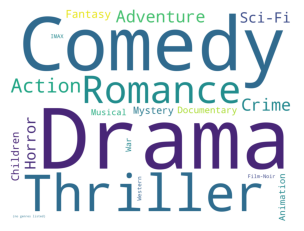

In [25]:
# [4]

# lấy mảng các thể loại và đếm lần thể loại xuất hiện
genres_dataset, genres_dataset_test = [], []
for gen in movies.genres:
    tmp = gen.split("|")
    for g in tmp:
        if g and g not in genres_dataset:
            genres_dataset.append(g)
            genres_dataset_test.append([g, 1])
            
        else:
            genres_dataset_test[genres_dataset.index(g)][1] += 1
            
# Sắp xếp lại dựa theo tổng số lần xuất hiện của thể loại đó trong tập dữ liệu
genres_dataset_test = sorted(genres_dataset_test, key=lambda genres_dataset_test: genres_dataset_test[1], reverse=True)
helper.multi_wordcloud(genres_dataset_test, filename='genres_wordcloud.png')

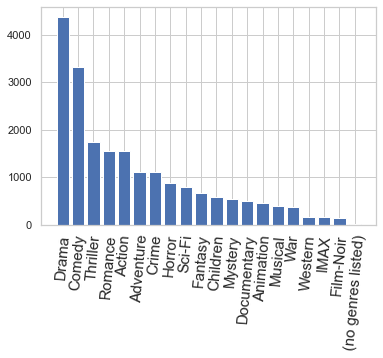

In [26]:
# [5]
# Số lần mà thể loại phim có phim thuộc thể loại đó 
helper.multi_bar(genres_dataset_test, filename='genres_bar.png')

In [27]:
# [6]
# Hiển thị số dòng (records) của từng table
print('The dataset contains: ', len(ratings), ' ratings of ', len(movies), ' movies.')


The dataset contains:  100004  ratings of  9125  movies.


## Romance & SciFi

Thử với tập dữ liệu mẫu (subset), và tìm thể loại phim mà được user yêu thích hơn (điểm rating cao hơn)

In [28]:
# [7]

# get_genre_ratings(ratings, movies, genres, column_names)
genre_ratings_columns = ['Romance', 'Sci-Fi'] # khởi tạo mảng thể loại cần phân tích
genre_ratings_avg_columns = ['avg_romance_rating', 'avg_scifi_rating'] # khởi tạo mảng label cho giá trị rating trung bình theo thể loại

# tính lượt rating trung bình từng thể loại ['Romance', 'Comedy']
genre_ratings = helper.get_genre_ratings(ratings, movies, genre_ratings_columns, genre_ratings_avg_columns)
print( "Number of records: ", len(genre_ratings))
genre_ratings.head()


Number of records:  671


,avg_romance_rating,avg_scifi_rating
1,3.50,2.40
2,3.59,3.80
3,3.65,3.14
4,4.50,4.26
5,4.08,4.00


In [29]:
# [8]
# bias_genre_rating_dataset(genre_ratings, score_limit_1, score_limit_2)
# tính rating trung bình theo thể loại của user, ở đây sử dụng limit_1_&_2 nhằm mục đích đảm bảo dữ liệu phân cụm rõ, hạn chế trường hợp thích cả 2 thể loại
biased_dataset = helper.bias_genre_rating_dataset(genre_ratings,genre_ratings_avg_columns, 3.2, 2.5)

print( "Number of records: ", len(biased_dataset))
biased_dataset.head()

# Sau khi chạy dòng này thì ta thấy rằng ta có 183 records trong tập dữ liệu test, và số lượt rating của từng thể loại phim 

Number of records:  183


,index,avg_romance_rating,avg_scifi_rating
0,1,3.50,2.40
1,3,3.65,3.14
2,6,2.90,2.75
3,7,2.93,3.36
4,12,2.89,2.62


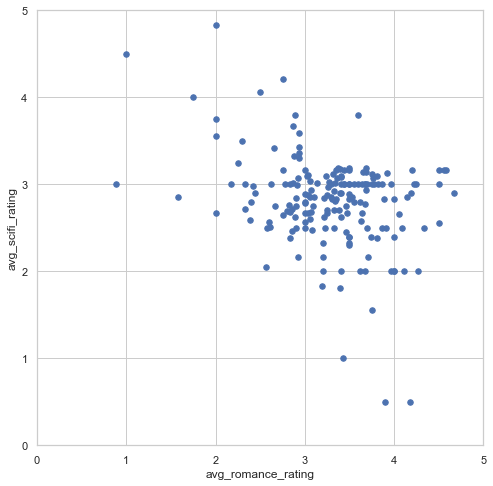

In [30]:
# [9]
# `%matplotlib inline`: hỗ trợ khi chạy ipython, câu lệnh của Jupyter Notebook để vẽ được các đồ thị bên trong cell của Jupyter Notebook
%matplotlib inline

# draw_scatterplot(x_data, x_label, y_data, y_label)
helper.draw_scatterplot(biased_dataset[genre_ratings_avg_columns[0]], genre_ratings_avg_columns[0], biased_dataset[genre_ratings_avg_columns[1]],genre_ratings_avg_columns[1])

In [31]:
# [10]
# Chuyển dữ liệu về dạng `list`
X = biased_dataset[genre_ratings_avg_columns].values

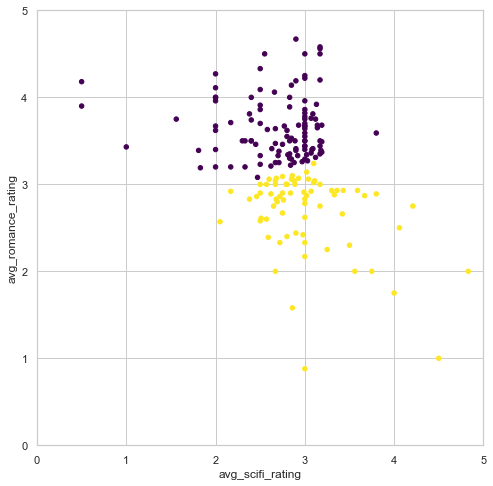

In [32]:
# [11]
# Phân cụm Kmeams với số cụm = 2

# TODO: Import KMeans
from sklearn.cluster import KMeans

# TODO: Create an instance of KMeans to find two clusters
kmeans_1 = KMeans(n_clusters=2)

# TODO: use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(X)

# Plot
helper.draw_clusters(biased_dataset, predictions, genre_ratings_avg_columns)

Như hình ta thấy hầu hết những người rating cho thể loại romance > 3 thì thuộc 1 nhóm (màu tím).

### Tiếp tục, thử với 3 cụm

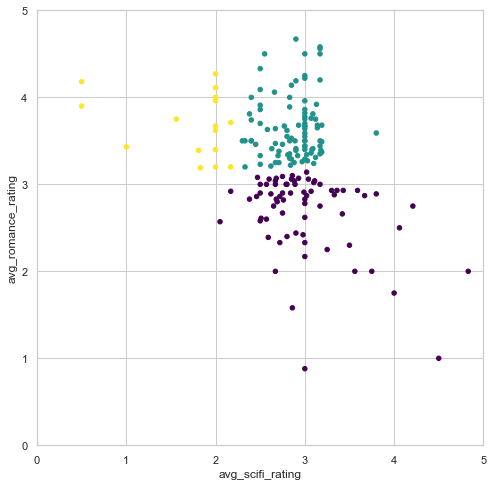

In [33]:
# [12]
# TODO: Create an instance of KMeans to find three clusters
kmeans_2 = KMeans(n_clusters=3)

# TODO: use fit_predict to cluster the dataset
predictions_2 = kmeans_2.fit_predict(X)

# Plot
helper.draw_clusters(biased_dataset, predictions_2, genre_ratings_avg_columns)

Hiện tại ta có 3 nhóm:
- Những người thích romance, không thích scifi (xanh)
- Những người thích scifi, không thích romance (tím)
- những người thích cả 2 (vàng)

---- 
Đối với K-means, bắt buộc phải xác định K trước, nếu K càng chính xác, thì ý nghĩa các phân cụm sẽ càng rõ ràng. Vì vậy, để xác định K, ta sử dụng phương pháp khuỷ tay.


## Tìm K

Tìm K bằng cách sử dụng `the elbow method` (phương pháp khuỷ tay), nó hoạt động bằng cách vẽ biểu đồ có giá trị tăng dần của k so với tổng sai số được tính dựa trên K đó. 


Cách tính chi tiết xem thêm `clustering_errors` trong file `helper`


In [34]:
# [14]
# Chọn range of k values để test, để đảm bảo hiệu xuất thay vì và lập qua từng k, thì chúng ta có thể sử dụng bước nhảy 3
possible_k_values = range(2, len(X)+1, 3)

# Tính giá trị errors cho tất cả k cần xét
errors_per_k = [helper.clustering_errors(k, X) for k in possible_k_values]


In [35]:
# [15]
# Optional: tìm các giá trị của K va silhouette khi chạy trên Kmeans với giá trị K
list(zip(possible_k_values, errors_per_k))

[(2, 0.3558817876472827),
 (5, 0.3468799816091042),
 (8, 0.3868872596590287),
 (11, 0.3458487848084633),
 (14, 0.3674394483806919),
 (17, 0.3719157598729349),
 (20, 0.3462976495109252),
 (23, 0.3644643941847684),
 (26, 0.362380666525948),
 (29, 0.37555396868493013),
 (32, 0.3766348631387763),
 (35, 0.35503519984087906),
 (38, 0.3667929250153076),
 (41, 0.35830039087055376),
 (44, 0.3899804661914255),
 (47, 0.38678629332677616),
 (50, 0.3758824092295341),
 (53, 0.3629757295982059),
 (56, 0.3650986585666859),
 (59, 0.3518507131197404),
 (62, 0.35542758638537736),
 (65, 0.34786414036355645),
 (68, 0.34504893204271464),
 (71, 0.361579229655793),
 (74, 0.35335302376768973),
 (77, 0.3267834867847267),
 (80, 0.3470245717903006),
 (83, 0.34431656522548865),
 (86, 0.3415073150883433),
 (89, 0.332386136941934),
 (92, 0.3288808724955499),
 (95, 0.3308243654983273),
 (98, 0.3190425527764562),
 (101, 0.3074789173857325),
 (104, 0.30805694583498117),
 (107, 0.2880380039917443),
 (110, 0.300499981286

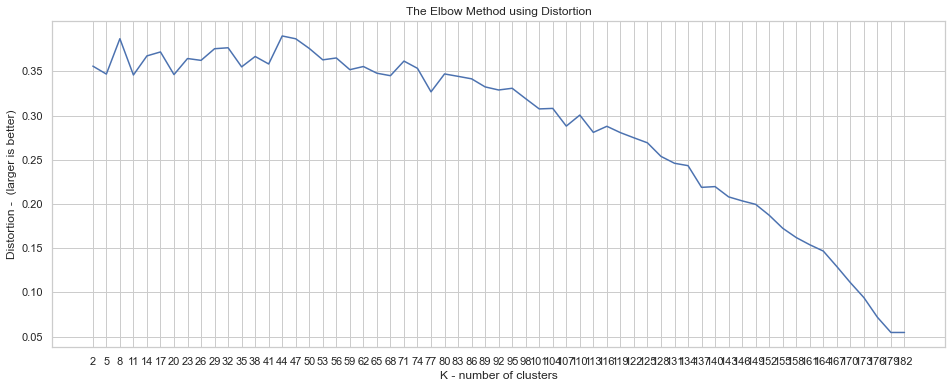

In [36]:
# [17]
# Plot the each value of K vs. the silhouette score at that value
fig, ax = plt.subplots(figsize=(16, 6))
ax.set_xlabel('K - number of clusters')
ax.set_ylabel('Distortion -  (larger is better)') # Khúc cua càng lớn càng tốt
ax.plot(possible_k_values, errors_per_k)
plt.title('The Elbow Method using Distortion') 

# Ticks and grid
xticks = np.arange(min(possible_k_values), max(possible_k_values)+1, 3.0)
ax.set_xticks(xticks, minor=False)
ax.set_xticks(xticks, minor=True)
ax.xaxis.grid(True, which='both')
yticks = np.arange(round(min(errors_per_k), 2), max(errors_per_k), .05)
ax.set_yticks(yticks, minor=False)
ax.set_yticks(yticks, minor=True)
ax.yaxis.grid(True, which='both')

Nhìn vào graph thì ta thấy ta có các lựa chọn K với các giá trị [5,8,17,...] 


Tuy nhiên nếu sử dụng K quá lớn, có thể gây ra các cụm vô nghĩa (nhiều phân cụm con có ý nghĩa giống nhau), vì vậy, ở đây ta chọn K=5 để tiến hành visualize

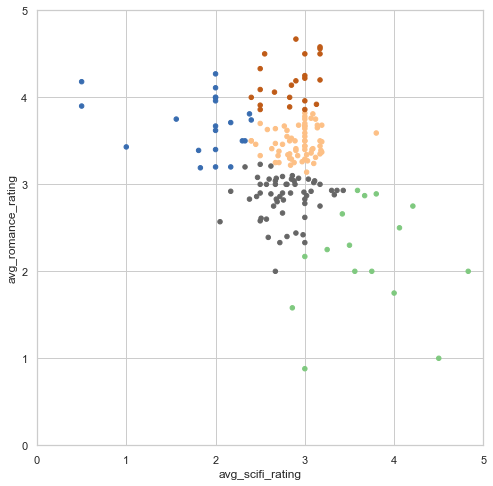

In [188]:
# [18]
# TODO: Create an instance of KMeans to find seven clusters
kmeans_4 = KMeans(n_clusters=5, random_state=6)

# TODO: use fit_predict to cluster the dataset
predictions_4 = kmeans_4.fit_predict(X)

# plot
helper.draw_clusters(biased_dataset, predictions_4,genre_ratings_avg_columns, cmap='Accent')

Note: Cần đảm bảo màu giữa các phân cụm không bị trùng lặp nhau 

Những người thích romance, không thích scifi (xanh dương)
Những người thích scifi, không thích romance (xanh lá)
Những người thích cả 2 (vàng cam)
Những người thích cả 2, nhưng romance có vẻ trội hơn (vàng đậm)
Những người thích cả 2, nhưng scifi có vẻ trội hơn (đen nhạt)

---
# Finish!